Epoch 1/100


C:\Users\tfeder\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.1520 - val_loss: 0.0163
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0327 - val_loss: 0.0203
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0193 - val_loss: 0.0074
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0155 - val_loss: 0.0096
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0150 - val_loss: 0.0082
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0129 - val_loss: 0.0093
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0126 - val_loss: 0.0114
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0117 - val_loss: 0.0088
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0107 - val_loss: 0.0070
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0092 - val_loss: 0.0103
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0097 - val_loss: 0.0107
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0077 - 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0025 - val_loss: 0.0096
Epoch 70/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0023 - val_loss: 0.0107
Epoch 71/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0023 - val_loss: 0.0115
Epoch 72/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0026 - val_loss: 0.0108
Epoch 73/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0025 - val_loss: 0.0087
Epoch 74/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0026 - val_loss: 0.0126
Epoch 75/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0026 - val_loss: 0.0132
Epoch 76/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0023 - val_loss: 0.0124
Epoch 77/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0023 - val_loss: 0.0118
Epoch 78/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0027 - val_loss: 0.0108
Epoch 79/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0029 - val_loss: 0.0112
Epoch 80/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0

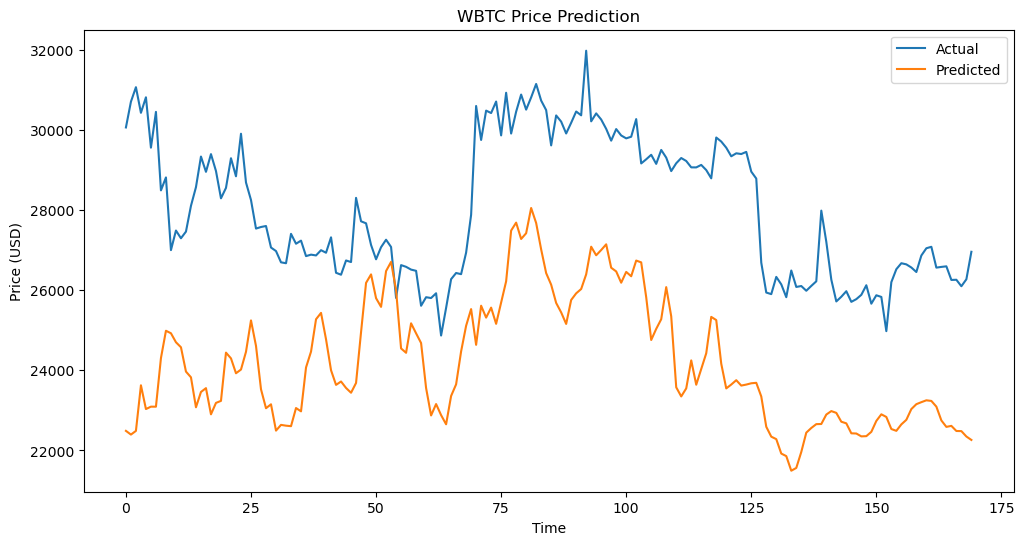

Root Mean Squared Error: 4122.401148287177
R-squared Score: -4.67867416227888


In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
df = pd.read_csv(r"C:\Users\tfeder\Documents\M2 CLASSES\Master Thesis\AAVE_Data\Questions\No_lags\WBTC_full_data_final_cleaned_no_outliers.csv")

# Convert date to datetime and sort
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

# Select features for prediction
features = ['balanceUSD', 'totalValueLockedUSD', 'totalBorrowBalanceUSD', 'variableBorrowRate', 'stableBorrowRate', 'supplyRate']
target = 'inputTokenPriceUSD'

# Shift the target variable to avoid look-ahead bias
df['target'] = df[target].shift(-1)

# Drop the last row as it will have NaN in the target column
df = df.dropna()

# Normalize the features
scaler = MinMaxScaler()
df[features + ['target']] = scaler.fit_transform(df[features + ['target']])

# Create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), :-1])
        y.append(data[i + seq_length - 1, -1])
    return np.array(X), np.array(y)

seq_length = 10
X, y = create_sequences(df[features + ['target']].values, seq_length)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, len(features))),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse transform the predictions and actual values
train_predictions = scaler.inverse_transform(np.concatenate((X_train[:, -1, :], train_predictions), axis=1))[:, -1]
test_predictions = scaler.inverse_transform(np.concatenate((X_test[:, -1, :], test_predictions), axis=1))[:, -1]
y_train_actual = scaler.inverse_transform(np.concatenate((X_train[:, -1, :], y_train.reshape(-1, 1)), axis=1))[:, -1]
y_test_actual = scaler.inverse_transform(np.concatenate((X_test[:, -1, :], y_test.reshape(-1, 1)), axis=1))[:, -1]

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual')
plt.plot(test_predictions, label='Predicted')
plt.title('WBTC Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Calculate and print the Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test_actual, test_predictions))
print(f"Root Mean Squared Error: {rmse}")

# Calculate and print the R-squared score
r2 = r2_score(y_test_actual, test_predictions)
print(f"R-squared Score: {r2}")

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load the dataset
file_path = "C:\\Users\\tfeder\\Documents\\M2 CLASSES\\Master Thesis\\AAVE_Data\\Questions\\No_lags\\WBTC_full_data_final_cleaned_no_outliers.csv"
data = pd.read_csv(file_path)

# Convert timestamp and date to datetime format
data['timestamp'] = pd.to_datetime(data['timestamp'])
data['date'] = pd.to_datetime(data['date'])

# Sort data by date to ensure temporal order
data = data.sort_values(by='date')

# Drop non-numeric and non-relevant columns
data_cleaned = data.drop(columns=['timestamp', 'date', 'token', 'id'])

# Shift the target variable by 1 day to prevent look-ahead bias
data_cleaned['inputTokenPriceUSD_next_day'] = data_cleaned['inputTokenPriceUSD'].shift(-1)

# Remove the last row which will have a NaN value for the shifted target
data_cleaned = data_cleaned[:-1]

# Define features (X) and target (y)
X = data_cleaned.drop(columns=['inputTokenPriceUSD', 'inputTokenPriceUSD_next_day'])
y = data_cleaned['inputTokenPriceUSD_next_day']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize Linear Regression model
linear_model = LinearRegression()

# Train the Linear Regression model
linear_model.fit(X_train, y_train)

# Predict on the test set
y_pred_linear = linear_model.predict(X_test)

# Evaluate the Linear Regression model
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_linear = r2_score(y_test, y_pred_linear)

# Print Linear Regression results
print("Linear Regression:")
print(f"Root Mean Squared Error (RMSE): {rmse_linear}")
print(f"R² Score: {r2_linear}")

# Initialize Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Random Forest Regressor model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest Regressor model
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# Print Random Forest Regression results
print("\nRandom Forest Regression:")
print(f"Root Mean Squared Error (RMSE): {rmse_rf}")
print(f"R² Score: {r2_rf}")


Linear Regression:
Root Mean Squared Error (RMSE): 6586.709693370653
R² Score: -13.515453408188307

Random Forest Regression:
Root Mean Squared Error (RMSE): 5459.447987526099
R² Score: -8.972201071593151


Epoch 1/100


C:\Users\tfeder\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.1457 - val_loss: 0.0185
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0454 - val_loss: 0.0049
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0222 - val_loss: 0.0095
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0198 - val_loss: 0.0094
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0183 - val_loss: 0.0082
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0169 - val_loss: 0.0079
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0155 - val_loss: 0.0060
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0151 - val_loss: 0.0095
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0149 - val_loss: 0.0079
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0148 - val_loss: 0.0069
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0144 - val_loss: 0.0077
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.011

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0030 - val_loss: 0.0077
Epoch 70/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0030 - val_loss: 0.0094
Epoch 71/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0034 - val_loss: 0.0070
Epoch 72/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0035 - val_loss: 0.0057
Epoch 73/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0029 - val_loss: 0.0097
Epoch 74/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0030 - val_loss: 0.0093
Epoch 75/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0031 - val_loss: 0.0059
Epoch 76/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0032 - val_loss: 0.0071
Epoch 77/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0027 - val_loss: 0.0065
Epoch 78/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0026 - val_loss: 0.0083
Epoch 79/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0028 - val_loss: 0.0085
Epoch 80/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss:

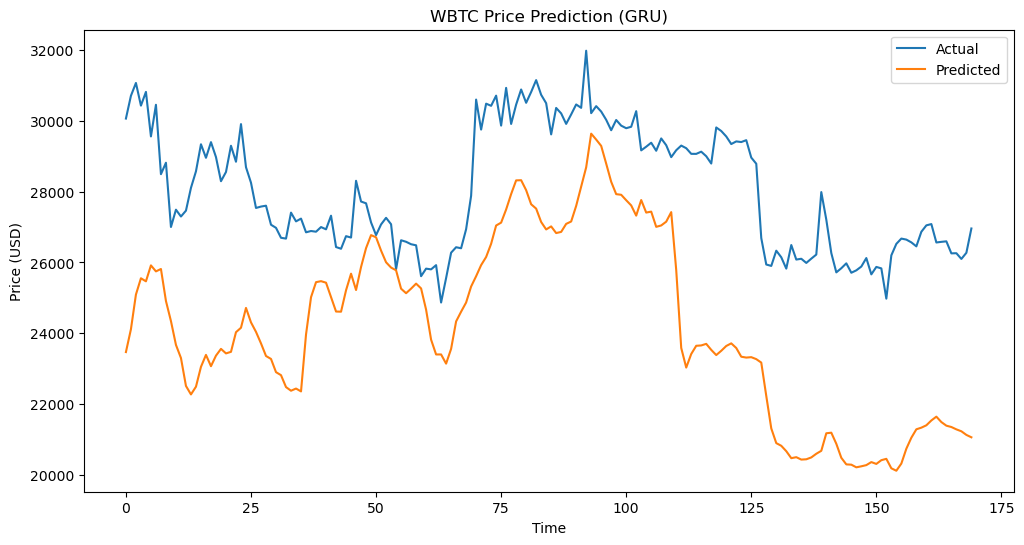

Root Mean Squared Error: 4264.109496259896
Mean Absolute Percentage Error: 13.856611900095785%


In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Load the data
df = pd.read_csv(r"C:\Users\tfeder\Documents\M2 CLASSES\Master Thesis\AAVE_Data\Questions\No_lags\WBTC_full_data_final_cleaned_no_outliers.csv")

# Convert date to datetime and sort
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

# Select features for prediction
features = ['balanceUSD', 'totalValueLockedUSD', 'totalBorrowBalanceUSD', 'variableBorrowRate', 'stableBorrowRate', 'supplyRate']
target = 'inputTokenPriceUSD'

# Shift the target variable to avoid look-ahead bias
df['target'] = df[target].shift(-1)

# Drop the last row as it will have NaN in the target column
df = df.dropna()

# Normalize the features
scaler = MinMaxScaler()
df[features + ['target']] = scaler.fit_transform(df[features + ['target']])

# Create sequences for GRU
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), :-1])
        y.append(data[i + seq_length - 1, -1])
    return np.array(X), np.array(y)

seq_length = 10
X, y = create_sequences(df[features + ['target']].values, seq_length)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the GRU model
model = Sequential([
    GRU(50, activation='relu', input_shape=(seq_length, len(features))),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse transform the predictions and actual values
train_predictions = scaler.inverse_transform(np.concatenate((X_train[:, -1, :], train_predictions), axis=1))[:, -1]
test_predictions = scaler.inverse_transform(np.concatenate((X_test[:, -1, :], test_predictions), axis=1))[:, -1]
y_train_actual = scaler.inverse_transform(np.concatenate((X_train[:, -1, :], y_train.reshape(-1, 1)), axis=1))[:, -1]
y_test_actual = scaler.inverse_transform(np.concatenate((X_test[:, -1, :], y_test.reshape(-1, 1)), axis=1))[:, -1]

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual')
plt.plot(test_predictions, label='Predicted')
plt.title('WBTC Price Prediction (GRU)')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Calculate and print the Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test_actual, test_predictions))
print(f"Root Mean Squared Error: {rmse}")

# Calculate and print the Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test_actual - test_predictions) / y_test_actual)) * 100
print(f"Mean Absolute Percentage Error: {mape}%")

C:\Users\tfeder\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


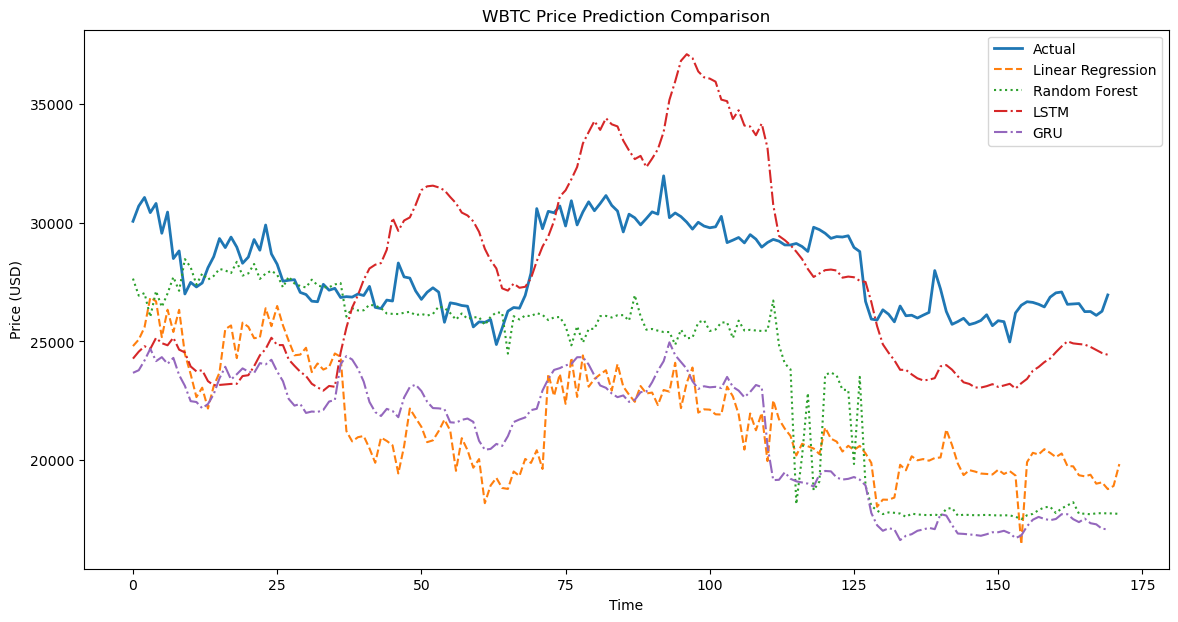

ValueError: Found input variables with inconsistent numbers of samples: [170, 172]

In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, GRU
import matplotlib.pyplot as plt

# Load the data
file_path = r"C:\Users\tfeder\Documents\M2 CLASSES\Master Thesis\AAVE_Data\Questions\No_lags\WBTC_full_data_final_cleaned_no_outliers.csv"
df = pd.read_csv(file_path)

# Convert date to datetime and sort
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

# Select features for prediction
features = ['balanceUSD', 'totalValueLockedUSD', 'totalBorrowBalanceUSD', 'variableBorrowRate', 'stableBorrowRate', 'supplyRate']
target = 'inputTokenPriceUSD'

# Shift the target variable to avoid look-ahead bias
df['target'] = df[target].shift(-1)

# Drop the last row as it will have NaN in the target column
df = df.dropna()

# Prepare data for Linear Regression and Random Forest
X = df[features]
y = df['target']

# Split the data into training and testing sets
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X, y, test_size=0.2, shuffle=False)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_lr, y_train_lr)
lr_predictions = lr_model.predict(X_test_lr)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_lr, y_train_lr)
rf_predictions = rf_model.predict(X_test_lr)

# Prepare data for LSTM and GRU
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[features + ['target']] = scaler.fit_transform(df[features + ['target']])

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), :-1])
        y.append(data[i + seq_length - 1, -1])
    return np.array(X), np.array(y)

seq_length = 10
X, y = create_sequences(df_scaled[features + ['target']].values, seq_length)

# Split the data for LSTM and GRU
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# LSTM model
lstm_model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, len(features))),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=0)
lstm_predictions = lstm_model.predict(X_test)

# GRU model
gru_model = Sequential([
    GRU(50, activation='relu', input_shape=(seq_length, len(features))),
    Dense(1)
])
gru_model.compile(optimizer='adam', loss='mse')
gru_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=0)
gru_predictions = gru_model.predict(X_test)

# Inverse transform predictions
lstm_predictions = scaler.inverse_transform(np.concatenate((X_test[:, -1, :], lstm_predictions), axis=1))[:, -1]
gru_predictions = scaler.inverse_transform(np.concatenate((X_test[:, -1, :], gru_predictions), axis=1))[:, -1]
y_test_actual = scaler.inverse_transform(np.concatenate((X_test[:, -1, :], y_test.reshape(-1, 1)), axis=1))[:, -1]

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(y_test_actual, label='Actual', linewidth=2)
plt.plot(lr_predictions, label='Linear Regression', linestyle='--')
plt.plot(rf_predictions, label='Random Forest', linestyle=':')
plt.plot(lstm_predictions, label='LSTM', linestyle='-.')
plt.plot(gru_predictions, label='GRU', linestyle='-.')
plt.title('WBTC Price Prediction Comparison')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Calculate and print metrics for each model
models = {
    'Linear Regression': lr_predictions,
    'Random Forest': rf_predictions,
    'LSTM': lstm_predictions,
    'GRU': gru_predictions
}

for name, predictions in models.items():
    rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))
    mape = np.mean(np.abs((y_test_actual - predictions) / y_test_actual)) * 100
    print(f"{name}:")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"Mean Absolute Percentage Error: {mape}%")
    print()